**Script name:** nmos_v0\
**Purpose:** This is version 0 of nmos layout design with the phidl package.\
**Author:** Yanbing Chen\
**Created date:** 09-23-2024\
**Copyright:** Hacker Fab @ Carnegie Mellon University\
**Contact info:** *yanbing2@andrew.cmu.edu*\
**Notes:** This Python macro should be loaded into KLayout as either ".py" file or ".lym" file with the interpreter set to "Python".

In [69]:
from phidl import Device
from phidl import quickplot as qp # Rename "quickplot()" to the easier "qp()"
import phidl.geometry as pg
import phidl.routing as pr

## Create some shape devices to be used as references

In [70]:
# Create a blank device to store gate reference
G = Device('gate')
# Define points and add a polygon enclosed by the points 
xpts = [0,5,5,3.5,3.5,1.5,1.5,0]
ypts = [0,0,5,5,  15, 15, 5,  5]
G_poly = G.add_polygon([xpts,ypts],layer = 0)

# Create a blank device 
AR = pg.rectangle(size=(15,8), layer = 1)


# Create a blank device to store gate via reference
VIA = pg.rectangle(size=(2,2), layer = 2)

AL = pg.rectangle(size=(4,4), layer = 3)

#qp(G)
#qp(AR)
#qp(GV)
#qp(ARLV)
#qp(ARRV)

## Reuse polygon (as reference)- *add_ref* or *<<*
We want to reuse this polygon repeatedly but do not want to make multiple copies of it. To do so, we need to make a second blank Device, this time called D. In this new Device we’ll reference our Device P which contains our polygon.


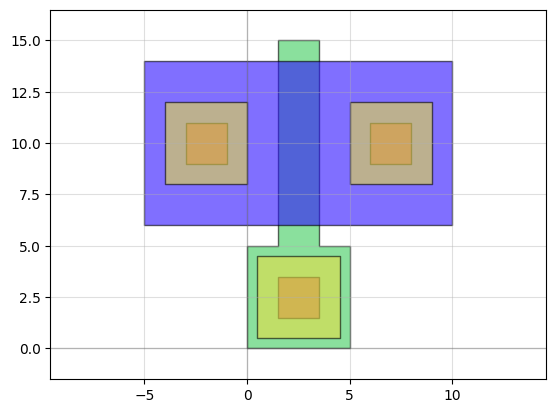

In [71]:
N1 = Device('nmos_N1')             # Create a new blank Device
# Add shapes to N1 as references
G_N1 = N1 <<G # or G_N1 = N1.add_ref(G)  
AR_N1 = N1 << AR.move([-5,6])
GV_N1 = N1 << VIA
ARLV_N1 = N1 << VIA
ARRV_N1 = N1 << VIA
ALGV_N1 = N1 << AL
ALLV_N1 = N1 << AL
ALRV_N1 = N1 << AL

GV_N1.move([1.5,1.5])
ARLV_N1.move([-3,9])
ARRV_N1.move([6,9])
ALGV_N1.move([0.5,0.5])
ALLV_N1.move([-4,8])
ALRV_N1.move([5,8])

qp(N1) # Quickplot the reference-containing device "N1"

#AR_N1.move([-5,6]) # Translate by dx = -5, dy = 7.5
#GV_N1.move([1.5,1.5])
#qp(N1) # Quickplot the reference-containing device "N1"

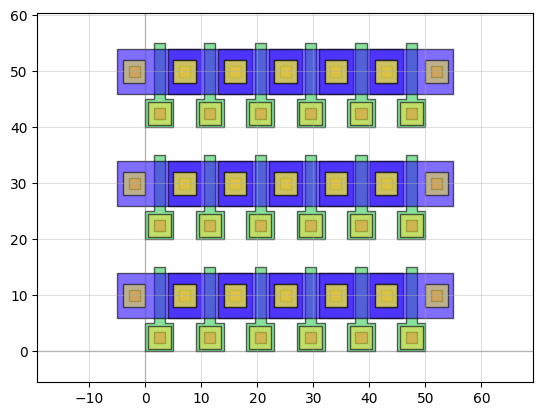

In [72]:
Nn = Device()
# Reference the Device "D" that 3 references in it
d_ref1 = Nn.add_array(N1, columns = 6, rows = 3, spacing = [9,20])

qp(Nn)
